## Подключение необходимых модулей

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from rdp import rdp
from PIL import Image, ImageDraw
from funcs import plot_curve, plot_sample, vectorize_image, smooth, DP_approx, DP_approx_optimized, graph_search_approx, piecewise_linear_approx, RJ_approx

## Загрузка изображений

In [2]:
# Загружаем изображения
first_sample = Image.open("random_sample1.jpg")
second_sample = Image.open("random_sample2.jpg")
third_sample = Image.open("random_sample3.jpg")
fourth_sample = Image.open("random_sample4.jpg")
fifth_sample = Image.open("random_sample5.jpg")

In [3]:
# Обрабатываем изображения и получаем пригодные для работы алгоритма изображения
first_in_vec = vectorize_image(first_sample)
second_in_vec = vectorize_image(second_sample)
third_in_vec = vectorize_image(third_sample)
fourth_in_vec = vectorize_image(fourth_sample)
fifth_in_vec = vectorize_image(fifth_sample)

# Создаем сглаженные копии изображений для дальнейшей обработки в "медленных" алгоритмах
first_smoothed = smooth(first_in_vec, 100)
second_smoothed = smooth(second_in_vec, 80)
third_smoothed = smooth(third_in_vec, 70)
fourth_smoothed = smooth(fourth_in_vec, 60)
fifth_smoothed = smooth(fifth_in_vec, 40)

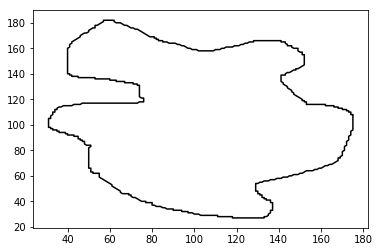

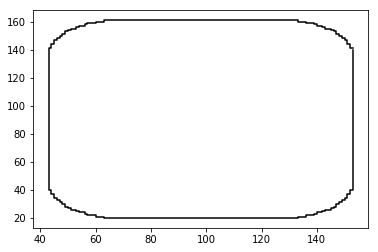

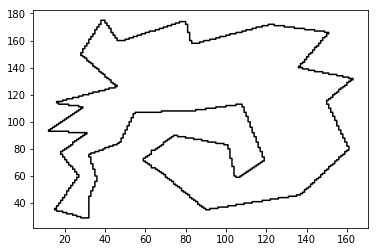

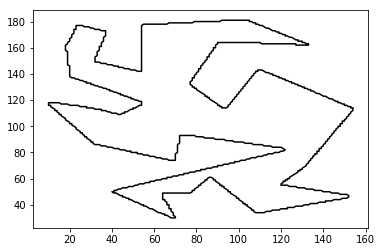

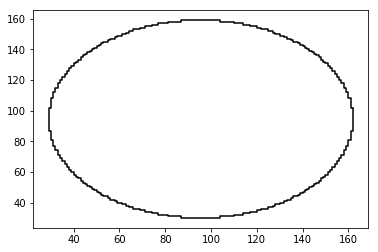

In [4]:
# Выводим на экран загруженные кривые
plot_sample(first_in_vec)
plot_sample(second_in_vec)
plot_sample(third_in_vec)
plot_sample(fourth_in_vec)
plot_sample(fifth_in_vec)

## Применение DP(dynamic programming) алгоримов

### Наивная реализация за $O(N^3M)$

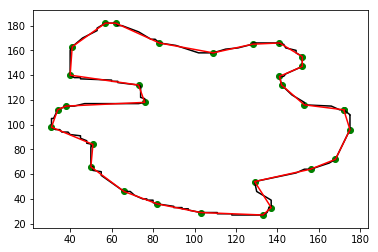

Egdes: 30


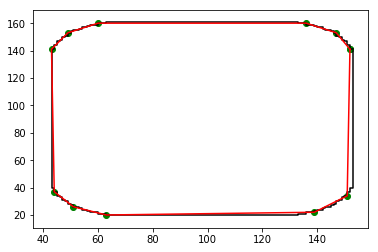

Egdes: 11


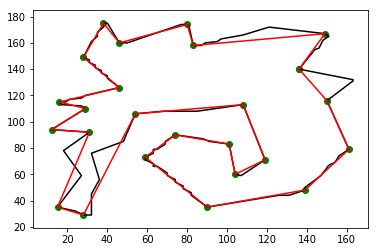

Egdes: 25


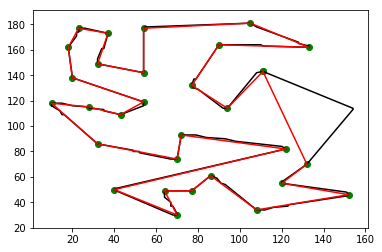

Egdes: 30


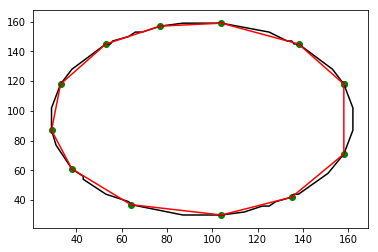

Egdes: 12


In [5]:
DP_first = DP_approx(first_smoothed, 30)
plot_curve(first_smoothed, DP_first)
print "Egdes:", len(DP_first) - 1

DP_second = DP_approx(second_smoothed, 11)
plot_curve(second_smoothed, DP_second)
print "Egdes:", len(DP_second) - 1

DP_third = DP_approx(third_smoothed, 25)
plot_curve(third_smoothed, DP_third)
print "Egdes:", len(DP_third) - 1

DP_fourth = DP_approx(fourth_smoothed, 30)
plot_curve(fourth_smoothed, DP_fourth)
print "Egdes:", len(DP_fourth) - 1

DP_fifth = DP_approx(fifth_smoothed, 12)
plot_curve(fifth_smoothed, DP_fifth)
print "Egdes:", len(DP_fifth) - 1

### Более оптимизированная версия этого алгоритма с асимптотикой $O(N^3)$

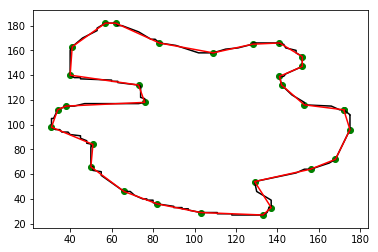

Egdes: 30


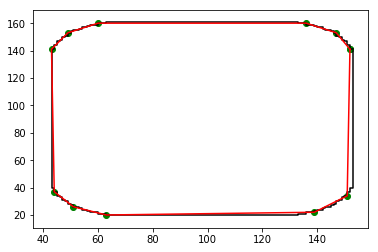

Egdes: 11


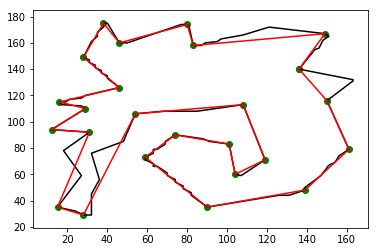

Egdes: 25


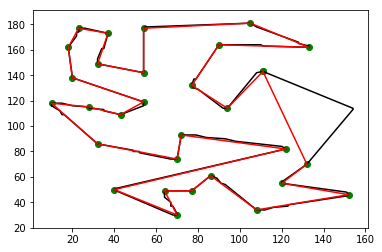

Egdes: 30


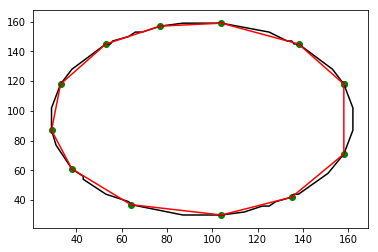

Egdest: 12


In [6]:
DP_opt_first = DP_approx_optimized(first_smoothed, 30)
plot_curve(first_smoothed, DP_opt_first)
print "Egdes:", len(DP_opt_first) - 1

DP_opt_second = DP_approx_optimized(second_smoothed, 11)
plot_curve(second_smoothed, DP_opt_second)
print "Egdes:", len(DP_opt_second) - 1

DP_opt_third = DP_approx_optimized(third_smoothed, 25)
plot_curve(third_smoothed, DP_opt_third)
print "Egdes:", len(DP_opt_third) - 1

DP_opt_fourth = DP_approx_optimized(fourth_smoothed, 30)
plot_curve(fourth_smoothed, DP_opt_fourth)
print "Egdes:", len(DP_opt_fourth) - 1

DP_opt_fifth = DP_approx_optimized(fifth_smoothed, 12)
plot_curve(fifth_smoothed, DP_opt_fifth)
print "Egdest:", len(DP_opt_fifth) - 1

Применение на несглаженных версиях изображений

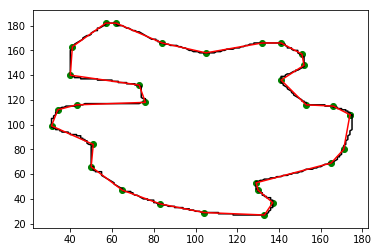

Egdes: 30


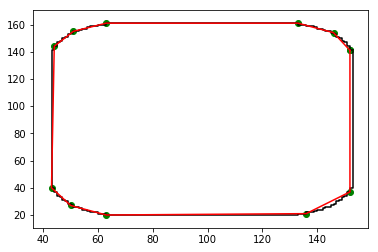

Egdes: 11


In [7]:
DP_opt_first_hard_test = DP_approx_optimized(first_in_vec, 30)
plot_curve(first_in_vec, DP_opt_first_hard_test)
print "Egdes:", len(DP_opt_first_hard_test) - 1

DP_opt_second_hard_test = DP_approx_optimized(second_in_vec, 11)
plot_curve(second_in_vec, DP_opt_second_hard_test)
print "Egdes:", len(DP_opt_second_hard_test) - 1

## Применение Graph-Search алгоритма

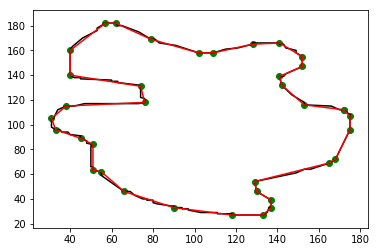

Edges: 36


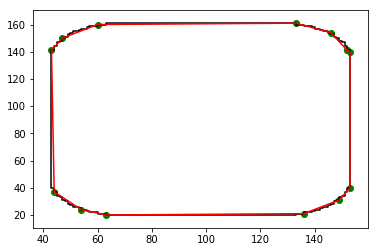

Edges: 13


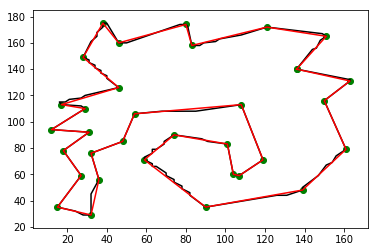

Edges: 33


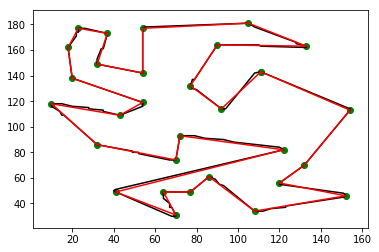

Edges: 30


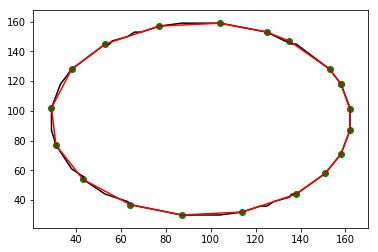

Edges: 19


In [8]:
GS_first = graph_search_approx(first_smoothed, epsilon=3)
plot_curve(first_smoothed, GS_first)
print "Edges:", len(GS_first) - 1

GS_second = graph_search_approx(second_smoothed, epsilon=3)
plot_curve(second_smoothed, GS_second)
print "Edges:", len(GS_second) - 1

GS_third = graph_search_approx(third_smoothed, epsilon=6)
plot_curve(third_smoothed, GS_third)
print "Edges:", len(GS_third) - 1

GS_fourth = graph_search_approx(fourth_smoothed, epsilon=6)
plot_curve(fourth_smoothed, GS_fourth)
print "Edges:", len(GS_fourth) - 1

GS_fifth = graph_search_approx(fifth_smoothed, epsilon=3)
plot_curve(fifth_smoothed, GS_fifth)
print "Edges:", len(GS_fifth) - 1

Применение на несглаженных версиях изображений

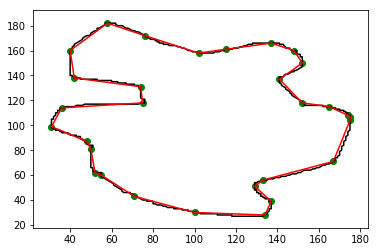

Edges: 30


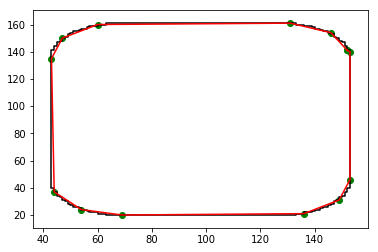

Edges: 13


In [9]:
GS_first_hard_test = graph_search_approx(first_in_vec, epsilon=4)
plot_curve(first_in_vec, GS_first_hard_test)
print "Edges:", len(GS_first_hard_test) - 1

GS_second_hard_test = graph_search_approx(second_in_vec, epsilon=2.8)
plot_curve(second_in_vec, GS_second_hard_test)
print "Edges:", len(GS_second_hard_test) - 1

## Применение кусочно-линейной аппроксимизации

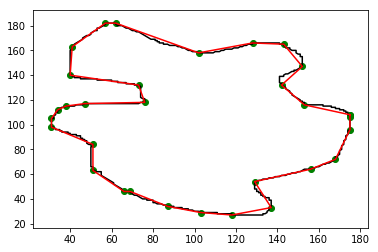

Edges: 31


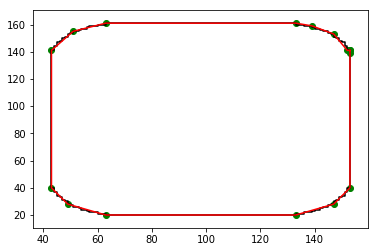

Edges: 15


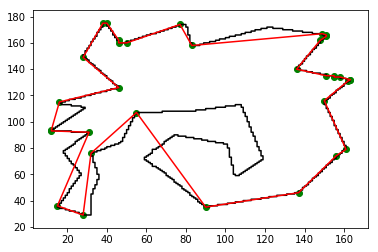

Edges: 33


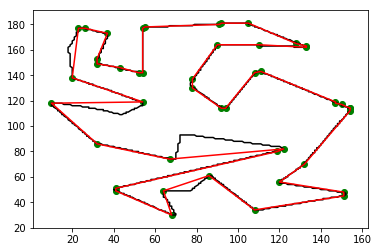

Edges: 46


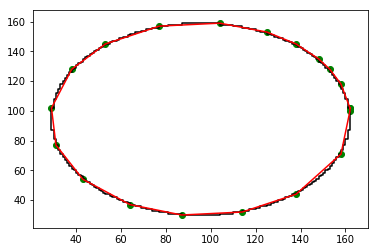

Edges: 19


In [10]:
pw_linear_first = piecewise_linear_approx(first_in_vec, 30)
plot_curve(first_in_vec, pw_linear_first)
print "Edges:", len(pw_linear_first) - 1

pw_linear_second = piecewise_linear_approx(second_in_vec, 16)
plot_curve(second_in_vec, pw_linear_second)
print "Edges:", len(pw_linear_second) - 1

pw_linear_third = piecewise_linear_approx(third_in_vec, 35)
plot_curve(third_in_vec, pw_linear_third)
print "Edges:", len(pw_linear_third) - 1

pw_linear_fourth = piecewise_linear_approx(fourth_in_vec, 50)
plot_curve(fourth_in_vec, pw_linear_fourth)
print "Edges:", len(pw_linear_fourth) - 1

pw_linear_fifth = piecewise_linear_approx(fifth_in_vec, 18)
plot_curve(fifth_in_vec, pw_linear_fifth)
print "Edges:", len(pw_linear_fifth) - 1

Применение на сглаженных версиях

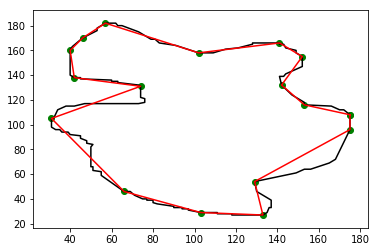

Edges: 17


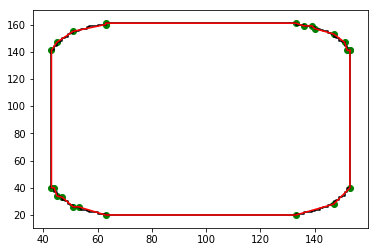

Edges: 23


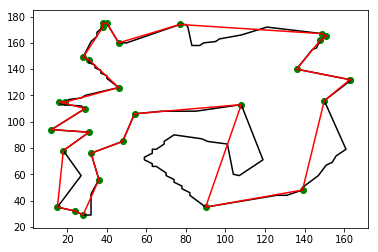

Edges: 30


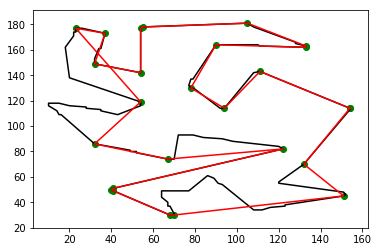

Edges: 25


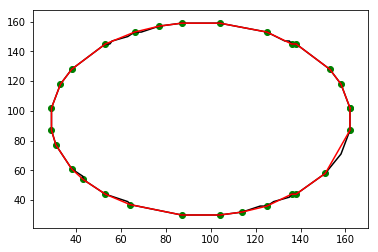

Edges: 28


In [11]:
pw_linear_first_easy = piecewise_linear_approx(first_smoothed, 16)
plot_curve(first_smoothed, pw_linear_first_easy)
print "Edges:", len(pw_linear_first_easy) - 1

pw_linear_second_easy = piecewise_linear_approx(second_smoothed, 30)
plot_curve(second_smoothed, pw_linear_second_easy)
print "Edges:", len(pw_linear_second_easy) - 1

pw_linear_third_easy = piecewise_linear_approx(third_smoothed, 35)
plot_curve(third_smoothed, pw_linear_third_easy)
print "Edges:", len(pw_linear_third_easy) - 1

pw_linear_fourth_easy = piecewise_linear_approx(fourth_smoothed, 30)
plot_curve(fourth_smoothed, pw_linear_fourth_easy)
print "Edges:", len(pw_linear_fourth_easy) - 1

pw_linear_fifth_easy = piecewise_linear_approx(fifth_smoothed, 35)
plot_curve(fifth_smoothed, pw_linear_fifth_easy)
print "Edges:", len(pw_linear_fifth_easy) - 1

## Применение RJ(Rosenfeld-Johnson) алгоритма

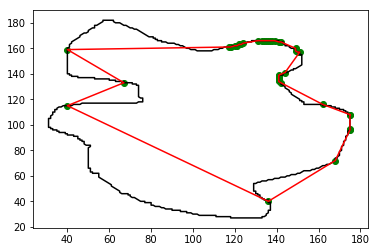

Edges: 38


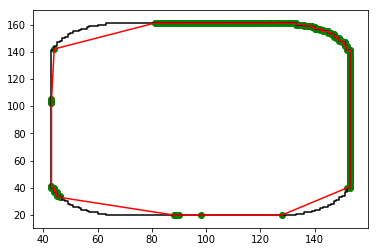

Edges: 216


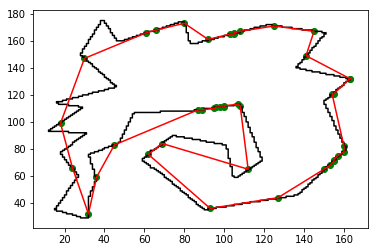

Edges: 41


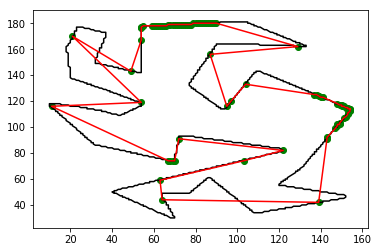

Edges: 82


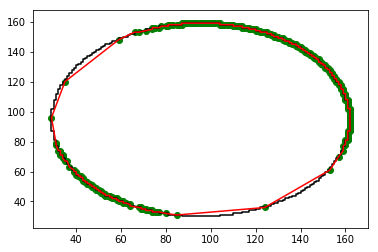

Edges: 257


In [12]:
RJ_first = RJ_approx(first_in_vec, 0.15)
plot_curve(first_in_vec, RJ_first)
print "Edges:", len(RJ_first) - 1

RJ_second = RJ_approx(second_in_vec, 0.2)
plot_curve(second_in_vec, RJ_second)
print "Edges:", len(RJ_second) - 1

RJ_third = RJ_approx(third_in_vec, 0.05)
plot_curve(third_in_vec, RJ_third)
print "Edges:", len(RJ_third) - 1

RJ_fourth = RJ_approx(fourth_in_vec, 0.05)
plot_curve(fourth_in_vec, RJ_fourth)
print "Edges:", len(RJ_fourth) - 1

RJ_fifth = RJ_approx(fifth_in_vec, 0.1)
plot_curve(fifth_in_vec, RJ_fifth)
print "Edges:", len(RJ_fifth) - 1

Применение на сглаженных версиях изображений

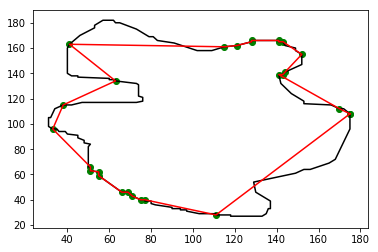

Edges: 27


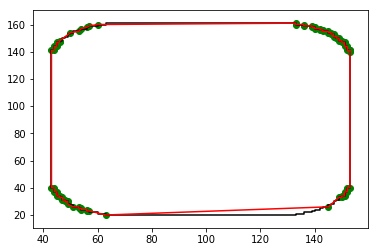

Edges: 74


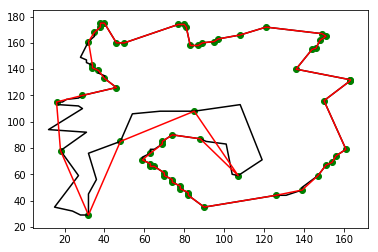

Edges: 63


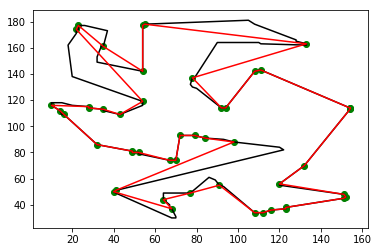

Edges: 48


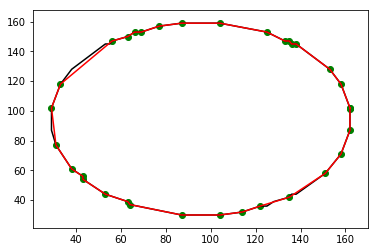

Edges: 33


In [13]:
RJ_first_easy = RJ_approx(first_smoothed, 0.15)
plot_curve(first_smoothed, RJ_first_easy)
print "Edges:", len(RJ_first_easy) - 1

RJ_second_easy = RJ_approx(second_smoothed, 0.15)
plot_curve(second_smoothed, RJ_second_easy)
print "Edges:", len(RJ_second_easy) - 1

RJ_third_easy = RJ_approx(third_smoothed, 0.05)
plot_curve(third_smoothed, RJ_third_easy)
print "Edges:", len(RJ_third_easy) - 1

RJ_fourth_easy = RJ_approx(fourth_smoothed, 0.05)
plot_curve(fourth_smoothed, RJ_fourth_easy)
print "Edges:", len(RJ_fourth_easy) - 1

RJ_fifth_easy = RJ_approx(fifth_smoothed, 0.15)
plot_curve(fifth_smoothed, RJ_fifth_easy)
print "Edges:", len(RJ_fifth_easy) - 1

## Применение RDP(Ramer-Douglas-Peucker) алгоритма

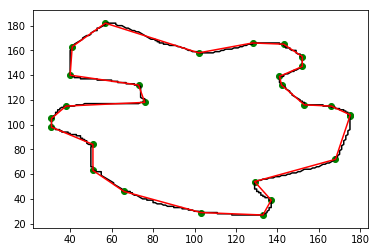

Edges: 26


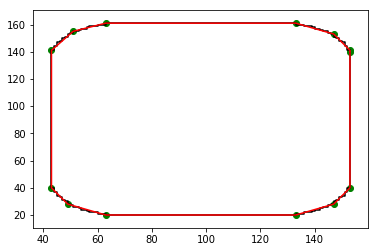

Edges: 12


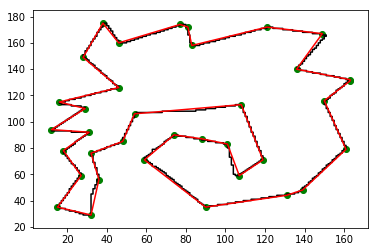

Edges: 35


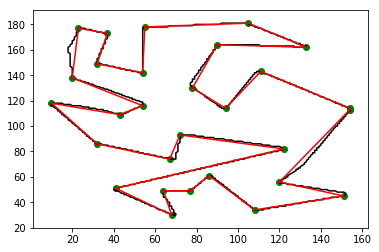

Edges: 28


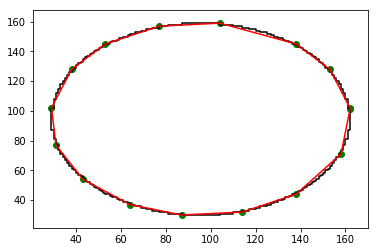

Edges: 15


In [14]:
rdp_first = rdp(first_in_vec, epsilon=3)
plot_curve(first_in_vec, rdp_first)
print "Edges:", len(rdp_first) - 1

rdp_second = rdp(second_in_vec, epsilon=4)
plot_curve(second_in_vec, rdp_second)
print "Edges:", len(rdp_second) - 1

rdp_third = rdp(third_in_vec, epsilon=3)
plot_curve(third_in_vec, rdp_third)
print "Edges:", len(rdp_third) - 1

rdp_fourth = rdp(fourth_in_vec, epsilon=6)
plot_curve(fourth_in_vec, rdp_fourth)
print "Edges:", len(rdp_fourth) - 1

rdp_fifth = rdp(fifth_in_vec, epsilon=3)
plot_curve(fifth_in_vec, rdp_fifth)
print "Edges:", len(rdp_fifth) - 1

Применение на сглаженных версиях изображений

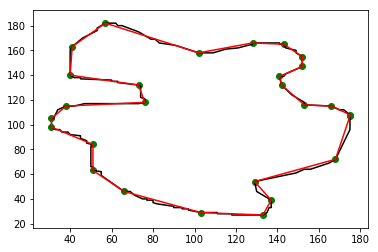

Edges: 26


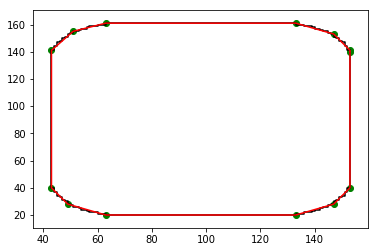

Edges: 12


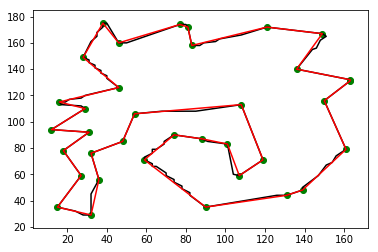

Edges: 35


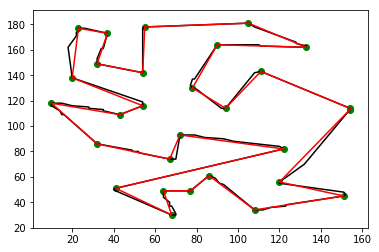

Edges: 28


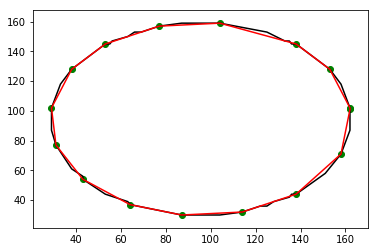

Edges: 15


In [15]:
rdp_first_easy = rdp(first_smoothed, epsilon=3)
plot_curve(first_smoothed, rdp_first_easy)
print "Edges:", len(rdp_first_easy) - 1

rdp_second_easy = rdp(second_smoothed, epsilon=4)
plot_curve(second_smoothed, rdp_second_easy)
print "Edges:", len(rdp_second_easy) - 1

rdp_third_easy = rdp(third_smoothed, epsilon=3)
plot_curve(third_smoothed, rdp_third_easy)
print "Edges:", len(rdp_third_easy) - 1

rdp_fourth_easy = rdp(fourth_smoothed, epsilon=6)
plot_curve(fourth_smoothed, rdp_fourth_easy)
print "Edges:", len(rdp_fourth_easy) - 1

rdp_fifth_easy = rdp(fifth_smoothed, epsilon=3)
plot_curve(fifth_smoothed, rdp_fifth_easy)
print "Edges:", len(rdp_fifth_easy) - 1